<img src='./img/logo.png'>
* ref : https://wikidocs.net/31698,  WikiDoc 

* <font color=red><b>자연어 처리(Natural Language Processing:NLP) <br>자연어의 의미를 분석하여 컴퓨터가 처리할 수 있도록 하는 일
-----------------------------------------------    

* ref : https://www.lfd.uci.edu/~gohlke/pythonlibs/#jpype

# KoNLPy 패키지 테스트
* 한나눔(Hannanum), 꼬꼬마(Kkma), 코모란(Komoran),Okt(Open Korea Text)<br>
<font color=red>
    1) morphs() : 형태소 추출<br>
    2) pos() : 품사 태깅(Part-of-speech tagging)<br>
    3) nouns() : 명사 추출<br>
    4) sentens() : 문장단위 출력

## Komoran

In [1]:
from konlpy.tag import Komoran
komoran = Komoran()
print(komoran.nouns("게시글이 apple 좋았다면 Dr Hong 쿄쿄쿄 공감을 눌러주세요!!"))

print(komoran.nouns("This article needs additional citations for verification. Please help improve this article by adding citations to reliable sources. Unsourced material may be challenged and removed."))

print(komoran.morphs("아버지가 방에 들어가신다"))
print(komoran.pos('아버지가 방에 들어가신다'))

print(komoran.pos('아버지가방에들어가신다'))

['게시', '글', '공감']
[]
['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다']
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]
[('아버지', 'NNG'), ('가방', 'NNP'), ('에', 'JKB'), ('들어가', 'VV'), ('시', 'EP'), ('ㄴ다', 'EC')]


## Okt

In [2]:
from konlpy.tag import Okt
okt = Okt()
print(okt.nouns("게시글이 좋았다면 공감을 눌러주세요!!"))

print(okt.pos('아버지가 방에 들어가신다'))
print(okt.pos('아버지가방에들어가신다'))

['게시', '글', '공감']
[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]
[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]


## Kkoma

In [3]:
from konlpy.tag import Kkma
kkma = Kkma()
print(kkma.nouns("게시글이 좋았다면 공감을 눌러주세요!!"))

print(kkma.pos('아버지가 방에 들어가신다'))
print(kkma.pos('아버지가방에들어가신다'))

['게시', '게시글', '글', '공감', '주세']
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN')]
[('아버지', 'NNG'), ('가방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('시', 'EPH'), ('ㄴ다', 'EFN')]


# nltk 패키지 테스트

<pre>
<font color=red><b>정제(cleaning) & 정규화(normalization)</b></font>
1) 규칙에 기반한 표기가 다른 단어들의 통합 :  Stemming, Lemmatization 
2) 대소문자 통합
3) 불필요한 단어(노이즈) 제거 : Regular Expression , Stopword

## 단어 토큰화(tokenization)
* re[a-zA-Z].split(' ')

In [4]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from keras.preprocessing.text import text_to_word_sequence

In [5]:
print('nltk :', word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

nltk : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [6]:
print(' keras :',text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))
print(' keras :',text_to_word_sequence("나는 밥을 먹는다."))

 keras : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
 keras : ['나는', '밥을', '먹는다']


## 문장 토큰화(Sentence Tokenization)
* 구두점(.)으로 자른다

In [7]:
from nltk.tokenize import sent_tokenize

text = "Since I'm actively looking. for Ph.D. Mr. students. I get the same question a dozen times every year."
print(' nltk :',sent_tokenize(text))

 nltk : ["Since I'm actively looking.", 'for Ph.D. Mr. students.', 'I get the same question a dozen times every year.']


In [8]:
text = "IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 aaa@gmail.com로 결과 좀. 보내줘. 그 후 점심 먹으러 가자."
print(' nltk :',sent_tokenize(text))

 nltk : ['IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 aaa@gmail.com로 결과 좀.', '보내줘.', '그 후 점심 먹으러 가자.']


In [9]:
from keras.preprocessing.text import Tokenizer
text = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
        '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다', 
        '토큰화 한 결과는 딥러닝에서 사용할 수 있습니다.']

token = Tokenizer()
token.fit_on_texts(text)
print(' keras :')
print('단어 카운트 : ',token.word_counts) 
print('문장 카운트 : ',token.document_count) 
print('각 단어가 몇 개의 문장에 포함되어 있는가 : ',token.word_docs) 
print('각 단어에 매겨진 인덱스 값 : ',token.word_index)

 keras :
단어 카운트 :  OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용할', 1), ('수', 1), ('있습니다', 1)])
문장 카운트 :  3
각 단어가 몇 개의 문장에 포함되어 있는가 :  defaultdict(<class 'int'>, {'합니다': 1, '먼저': 1, '텍스트의': 2, '나누어': 1, '각': 1, '토큰화': 3, '단어를': 1, '딥러닝에서': 2, '단어로': 1, '인식됩니다': 1, '해야': 1, '결과는': 1, '사용할': 1, '한': 1, '있습니다': 1, '수': 1})
각 단어에 매겨진 인덱스 값 :  {'토큰화': 1, '텍스트의': 2, '딥러닝에서': 3, '먼저': 4, '각': 5, '단어를': 6, '나누어': 7, '합니다': 8, '단어로': 9, '해야': 10, '인식됩니다': 11, '한': 12, '결과는': 13, '사용할': 14, '수': 15, '있습니다': 16}


## 한국어 전용 띄어쓰기 

In [10]:
# # ! pip install kss XXXXXXXXXXXXXXXXX
# # import kss    kss.split_sentences(text)

In [11]:
from pykospacing import spacing
text = '딥러닝 자연어처리가재미있기는합니다.아마도이제 해보면 알걸요?'
print(text)

res = spacing(text) 
print(f'pykospacing 띄어쓰기 \n: {res}')

딥러닝 자연어처리가재미있기는합니다.아마도이제 해보면 알걸요?
pykospacing 띄어쓰기 
: 딥러닝 자연어 처리가 재미있기는 합니다. 아마도 이제 해보면 알 걸요?


## 어간 추출(Stemming) , 표제어 추출(Lemmatization)
* Lemmatization : 품사 태깅과 같이 써야 정확하다<br>

<pre>
* Stemming
    am → am
    the going → the go
    having → hav
* Lemmatization
    am → be
    the going → the going
    having → have

* 어간(stem) 
    용언(동사, 형용사)을 활용할 때, 원칙적으로 모양이 변하지 않는 부분. 활용에서 어미에 선행하는 부분. 
    때론 어간의 모양도 바뀔 수 있음(예: 긋다, 긋고, 그어서, 그어라).

* 어미(ending)
    용언의 어간 뒤에 붙어서 활용하면서 변하는 부분이며, 여러 문법적 기능을 수행

In [12]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
words = ['policy', 'doing', 'am', 'done', 'having', 'going']
print(words)
print([lemmatizer.lemmatize(w, 'v') for w in words])

['policy', 'doing', 'am', 'done', 'having', 'going']
['policy', 'do', 'be', 'do', 'have', 'go']


## 불용어(Stopword)
* 자주 등장하지만 분석을 하는 것에 있어서는 큰 도움이 되지 않는 단어들
* ref : https://github.com/stopwords-iso/stopwords-ko
* ./dataset/ko_stopword_dict.txt

In [13]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
stop_words_list = stopwords.words('english')  #--------nltk
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [14]:
import pandas as pd
import numpy as np
df = pd.read_csv("./dataset/ko_stopword_dict.txt")
df['stop'].values[:5]

array(['아', '휴', '아이구', '아이쿠', '아이고'], dtype=object)

# mecab(은전한닢) 패키지 테스트

In [15]:
from konlpy.tag import Mecab
mecab = Mecab(r"C:\\mecab\\mecab-ko-dic")
res = mecab.pos('아버지가방에들어가신다')
print(res)

[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('신다', 'EP+EC')]


## 문장 토큰화
* 단어토큰화, 띄어쓰기, 불용어처리

In [16]:
import re
# from konlpy.tag import Okt
from konlpy.tag import Mecab
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize

def my_stopword(text,tokenizer):    
    #stopwords = ['이번','에','을', '를', '이', '가', '은', '는']
    df = pd.read_csv("./dataset/ko_stopword_dict.txt") #------ 기본 header=None
    list1 = df['stop'].values.tolist()
    
    list2 = ['게','한','은', '갖', '고', '있']                           #------ 추가본
    stopwords = list1 + list2
    
    txt = re.sub('[^가-힣a-z]', ' ', text)
    # nltk_morphs = tokenizer.morphs(txt)
    mecab_morphs  = tokenizer.morphs(txt)
    token = [t for t in mecab_morphs if t not in stopwords]
    return token

# tokenizer = Okt()
mecab = Mecab(r"C:\\mecab\\mecab-ko-dic")

text_list = ["이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!",
             "나는 그 전처리를 아주 많이 베우고 있다. 그래서 나는 기분이 좋다",
             "어제의 최상현은 정말 잘생겼다고 생각하지 않는다."]
print( len(text_list))

for text in text_list:
    for sent in sent_tokenize(text):
        res= my_stopword(sent,mecab)
        print(text, '\n', sent)
        print("품사 태깅:", res)
        print("단어토근화:",mecab.nouns(sent))
    print("----"*20)

3
이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!! 
 이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!
품사 태깅: ['새롭', '개봉', '영화', '배우', '훌륭', '연기력', '아름다운', '목소리']
단어토근화: ['이번', '개봉', '영화', '배우', '연기력', '목소리']
이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!! 
 !
품사 태깅: []
단어토근화: []
--------------------------------------------------------------------------------
나는 그 전처리를 아주 많이 베우고 있다. 그래서 나는 기분이 좋다 
 나는 그 전처리를 아주 많이 베우고 있다.
품사 태깅: ['는', '전처리', '아주', '많이', '베', '우', '다']
단어토근화: ['나', '전처리']
나는 그 전처리를 아주 많이 베우고 있다. 그래서 나는 기분이 좋다 
 그래서 나는 기분이 좋다
품사 태깅: ['는', '기분', '좋', '다']
단어토근화: ['나', '기분']
--------------------------------------------------------------------------------
어제의 최상현은 정말 잘생겼다고 생각하지 않는다. 
 어제의 최상현은 정말 잘생겼다고 생각하지 않는다.
품사 태깅: ['어제', '최상현', '정말', '잘', '생겼', '다고', '생각', '지', '않', '는다']
단어토근화: ['어제', '최상현', '생각']
--------------------------------------------------------------------------------


# 단어 카운트

## [실습] 식수예측(중식메뉴) 
* 중식메뉴 + (워드클라우드)

In [23]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from konlpy.tag import Mecab
mecab = Mecab(r"C:\\mecab\\mecab-ko-dic")

from keras.preprocessing.text import text_to_word_sequence

from nltk.tokenize import word_tokenize

In [24]:
df = pd.read_csv("../comp/sicksu_d/dataset/train.csv")
df[['중식메뉴']].head(1)

,중식메뉴
0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ..."


In [25]:
dfcp = df['중식메뉴'][:3].copy()

In [26]:
dfcp.head()

0    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...
1    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...
2    카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...
Name: 중식메뉴, dtype: object

In [27]:
tot_list = []
for text in dfcp:      #item: 카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침
    print(text)
    
    text = re.sub(r'/^\s+|\s+$/g', '', text.strip())#앞뒤 공백 제거
    text = text.replace(r' /','/')  #앞뒤 공백 제거
    text = text.replace(r'/ ','/')  #앞뒤 공백 제거
    text = re.sub(r'\([^)]*\)', '', text.strip())              #(s) 제거
    text = re.sub(r'[^)]*\)', '', text.strip())                #s) 제거
    text = re.sub(r'\([^)]*', '', text.strip())                #(s 제거
    text = re.sub(r'\*[^)]*', '', text.strip())                #*s 제거
    text = re.sub(r'\&[^)]*', '', text.strip())                #&s 제거
    text = re.sub(' +', ' ', text.strip())                     #공백,탭 제거
    text = re.sub(r'쌀밥/잡곡밥', '쌀밥', text.strip())         # /s 제거        
    
    # nouns = mecab.nouns(item)            #['카레', '덮밥', '팽이', '장국', ..]
    # nouns = text_to_word_sequence(text)  #['쌀밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치']
    nouns = word_tokenize(text)            #['쌀밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치']
    print(nouns)                  
    print()
    tot_list.extend(nouns)    

print(tot_list)    

쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산) 
['쌀밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치']

쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무침  요구르트  배추겉절이 (배추,고추가루:국내산) 
['쌀밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이']

카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침  견과류조림  요구르트  포기김치 (배추,고추가루:국내산) 
['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치']

['쌀밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치', '쌀밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이', '카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치']


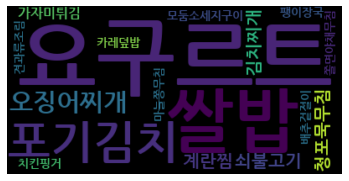

In [28]:
text = " ".join(tot_list)
wordcloud = WordCloud(max_font_size=100, font_path='C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## sklearn..CountVectorizer()

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords 

In [21]:
df = pd.read_csv("./dataset/ko_stopword_dict.txt") #------ 기본 header=None
list1 = df['stop'].values.tolist()
cnt_vt = CountVectorizer(stop_words=list1)    
    
text_list = ["내가 좋아하는 사과는 빨간 사과이다. 사과라서 좋다.",
             "바나나는 노랗다."]
print(text_list)

res = cnt_vt.fit_transform(text_list)  #Iterable
print(res)  # COO vs. CSR
print(res.toarray())

print(cnt_vt.vocabulary_)    
vocab_sorted = sorted(cnt_vt.vocabulary_.items(), key = lambda x:x[1], reverse = True)
print(vocab_sorted)

['내가 좋아하는 사과는 빨간 사과이다. 사과라서 좋다.', '바나나는 노랗다.']
  (0, 0)	1
  (0, 8)	1
  (0, 4)	1
  (0, 3)	1
  (0, 6)	1
  (0, 5)	1
  (0, 7)	1
  (1, 2)	1
  (1, 1)	1
[[1 0 0 1 1 1 1 1 1]
 [0 1 1 0 0 0 0 0 0]]
{'내가': 0, '좋아하는': 8, '사과는': 4, '빨간': 3, '사과이다': 6, '사과라서': 5, '좋다': 7, '바나나는': 2, '노랗다': 1}
[('좋아하는', 8), ('좋다', 7), ('사과이다', 6), ('사과라서', 5), ('사과는', 4), ('빨간', 3), ('바나나는', 2), ('노랗다', 1), ('내가', 0)]


# Vectorize

## BoW(Bag Of Word)
* 문서를 벡터로 변환하는 가장 기본적인 방법으로, 문서 내의 모든 단어를 모아 가방(Bag of words)를 만들고, <br>
  특정 문서에 어떤 단어가 들어있는지를 리스트 형태의 숫자로 나타내는 것
---------------------------------------
<pre>
sentence1 = 'This is a black cat'
sentence2 = 'This is a white dog'

BoW = ['this', 'is', 'a', 'black', 'cat', 'white', 'dog']
dictionary = {'a': 2, 'black': 3, 'cat': 4, 'dog': 6, 'is': 1, 'this': 0, 'white': 5}

<font color=red size=3><b>Tokenize vs. Vectorize</b></font>
# Tokenize : 자르기
sentence1 = ['This', 'is', 'a', 'black', 'cat']
sentence2 = ['This', 'is', 'a', 'white', 'dog']

# vectorize : 사전존재시 1
# dictionary: ['this', 'is', 'a', 'black', 'cat', 'white', 'dog']
sentence1 = [1, 1, 1, 1, 1, 0, 0]
sentence2 = [1, 1, 1, 0, 0, 1, 1]
</pre>

-----

## sklearn..CountVectorizer()
* ref : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
*  문서 집합(문서 리스트)에서 단어 토큰을 생성하고 각 단어를 세어 BOW 기반으로 벡터 생성
<pre>
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(#ngram_range=(1, 1), 
                     ngram_range=(1, 2), 
                     #stop_words=[],
                     token_pattern='(?u)\\b\\w\\w+\\b'  #단어2글자이상만
                    )
corpus = [ 'This is a black cat',
           'This is a white dog']
cv.fit(corpus)
cv.vocabulary_

{'this': 7,
 'is': 4,
 'black': 0,
 'cat': 2,
 'this is': 8,
 'is black': 5,
 'black cat': 1,
 'white': 9,
 'dog': 3,
 'is white': 6,
 'white dog': 10}

## sklearn..TfidfVectorizer()
* (TF-IDF, Term Frequency-Inverse Document Frequency) : 우선 DTM을 만든 후, TF-IDF 가중치를 부여한 BOW 벡터 생성
* 많은 문서에 등장하는 단어는 비중이 작아지고, 특정 문서군에서만 등장하는 단어는 비중이 높아진다.
* ref [수식]: https://tlab.it/en/allegati/help_en_online/gtfidf.htm<br><br>
<pre>
class sklearn.feature_extraction.text.TfidfVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, analyzer='word', stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.float64'>, norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)[source]

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
corpus = [ 'This is a black cat',
           'This is a white dog']


print(tfidf.fit_transform(corpus).toarray())
print(tfidf.vocabulary_)



[[0.57615236 0.57615236 0.         0.40993715 0.40993715 0.        ]
 [0.         0.         0.57615236 0.40993715 0.40993715 0.57615236]]
{'this': 4, 'is': 3, 'black': 0, 'cat': 1, 'white': 5, 'dog': 2}


* TF-IDF = TF * IDF

* 문서(d), 단어(t), 문서총개수(n)
* <font color='red'> $ tf(d,t) $ : 특정 문서 d에서의 특정 단어 t의 등장 횟수</font>
* <font color='red'>  $df(t)$ : 특정 단어 t가 등장한 문서의 수 </font>
* <font color='red'>  $idf(d, t) = log (\frac{n}{1+df(t)})$ : df(t) 역수</font><br>
<img src='http://www.kwangsiklee.com/wp-content/uploads/2017/11/searchengine3_1600.png' width=700>

## Keras..Tokenizer()
* 입력된 코퍼스의 빈도수를 기준으로 단어 집합 생성

In [68]:
from keras.preprocessing.text import Tokenizer
corpus = [ 'This is a black cat',
           'This is a white dog']

token = Tokenizer()
token.fit_on_texts(corpus)
print(' keras :')
print('단어 카운트 : ',token.word_counts) 
print('문장 카운트 : ',token.document_count) 
print('각 단어가 몇 개의 문장에 포함되어 있는가 : ',token.word_docs) 
print('각 단어에 매겨진 인덱스 값 : ',token.word_index)

 keras :
단어 카운트 :  OrderedDict([('this', 2), ('is', 2), ('a', 2), ('black', 1), ('cat', 1), ('white', 1), ('dog', 1)])
문장 카운트 :  2
각 단어가 몇 개의 문장에 포함되어 있는가 :  defaultdict(<class 'int'>, {'cat': 1, 'this': 2, 'is': 2, 'a': 2, 'black': 1, 'white': 1, 'dog': 1})
각 단어에 매겨진 인덱스 값 :  {'this': 1, 'is': 2, 'a': 3, 'black': 4, 'cat': 5, 'white': 6, 'dog': 7}


# 패딩(padding)
* 병렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업

## keras..pad_sequences()
* tokenizer.fit_on_texts(L) 
* enc=tokenizer.texts_to_sequences(L) 
* pad_sequences(enc)<br><br>
<pre>
tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen=None, dtype="int32", padding="pre", truncating="pre", value=0.0
)

In [78]:
from keras.preprocessing.text import Tokenizer
corpus = [['This is a black cat'],
          [ 'This is a white dog at home'] ]  #병렬 문장

# (2,1)[[],[]]   (2,) ['...' ,'...']
print(np.array(corpus).shape)
corpus = np.array(corpus).reshape(-1)
print(corpus.shape)


tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
print('단어 카운트 : ',tokenizer.word_counts) 

#encoding = ----- 글자-> 숫자
encoding = tokenizer.texts_to_sequences(corpus)   #[[ 1, 2, ..] , ['1, 2, ..]]
#------------------------------------keras가 하는 동작을 연습해본것
# def texts_to_sequnces(self, corpus):
#     tot_list = []
#     for c in corpus:
#         token = Tokenizer()
#         token.fit_on_texts(c)
#         tot_list.append(token.word_index)   # {'this': 1, 'is': 2, 'a': 3, 'black': 4,...}  
#     #tot_list [{'this': 1, 'is': 2, ..} , {'this': 1, 'is': 2, ..} ]
#     #tot_list [[ 1, 2, ..] , ['1, 2, ..]]
#     return tot_list


from keras.preprocessing.sequence import pad_sequences
padding_res = pad_sequences(sequences=encoding, 
                   maxlen=8,     #-----문장들이 가지고 있는 단어갯수 중 최대 단어수 == voca_size
                   padding="pre"  #앞에서부터 0을 채워서 제일 긴 길이에 맞추기 pre/post
                  )
print(padding_res)

(2, 1)
(2,)
단어 카운트 :  OrderedDict([('this', 2), ('is', 2), ('a', 2), ('black', 1), ('cat', 1), ('white', 1), ('dog', 1), ('at', 1), ('home', 1)])
[[0 0 0 1 2 3 4 5]
 [0 1 2 3 6 7 8 9]]


## keras..to_categorical() 
* 원핫인코딩

## [실습] 식수예측(중식메뉴) 
* 중식메뉴 + (워드클라우드)

In [35]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer

In [36]:
df = pd.read_csv("../comp/sicksu_d/dataset/train.csv")
df[['중식메뉴']].head(1)

,중식메뉴
0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ..."


In [37]:
dfcp = df['중식메뉴'][:3].copy()

In [38]:
dfcp.head()

0    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...
1    쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...
2    카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...
Name: 중식메뉴, dtype: object

In [40]:
tot_list = []
for text in dfcp:      #item: 카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침
    text = re.sub(r'/^\s+|\s+$/g', '', text.strip())#앞뒤 공백 제거
    text = text.replace(r' /','/')  #앞뒤 공백 제거
    text = text.replace(r'/ ','/')  #앞뒤 공백 제거
    text = re.sub(r'\([^)]*\)', '', text.strip())              #(s) 제거
    text = re.sub(r'[^)]*\)', '', text.strip())                #s) 제거
    text = re.sub(r'\([^)]*', '', text.strip())                #(s 제거
    text = re.sub(r'\*[^)]*', '', text.strip())                #*s 제거
    text = re.sub(r'\&[^)]*', '', text.strip())                #&s 제거
    text = re.sub(' +', ' ', text.strip())                     #공백,탭 제거
    text = re.sub(r'쌀밥/잡곡밥', '쌀밥', text.strip())         # /s 제거        
    tot_list.append(text)
print(tot_list)    

['쌀밥 오징어찌개 쇠불고기 계란찜 청포묵무침 요구르트 포기김치', '쌀밥 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉절이', '카레덮밥 팽이장국 치킨핑거 쫄면야채무침 견과류조림 요구르트 포기김치']
